In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt

In [29]:
BRK = wb.DataReader('BRK-A', data_source='yahoo', start='1995-1-1')

In [30]:
BRK.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,20500.0,20550.0,20250.0,20400.0,27000,20400.0
1995-01-04,20400.0,20550.0,20350.0,20550.0,13000,20550.0
1995-01-05,20500.0,20500.0,20500.0,20500.0,14000,20500.0
1995-01-06,20550.0,20600.0,20550.0,20600.0,4000,20600.0
1995-01-09,20700.0,21200.0,20700.0,21200.0,21000,21200.0


In [31]:
BRK.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-05-05,250530.0,250530.0,249100.0,250000.0,400,250000.0
2017-05-08,250000.0,250000.0,246401.0,247160.0,300,247160.0
2017-05-09,247750.0,247940.0,245000.0,246000.0,400,246000.0
2017-05-10,245800.0,245850.0,245100.0,245850.0,400,245850.0
2017-05-11,245770.0,245770.0,243770.0,245240.0,200,245240.0


# Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

*Adj Close* is "Adjusted close price", adjusted by dividends and other events at the close of the market at that date.

In [32]:
BRK['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print(BRK['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
1995-01-10    0.012320
1995-01-11   -0.002028
1995-01-12    0.010163
1995-01-13    0.011736
1995-01-16    0.008000
1995-01-17    0.003968
1995-01-18   -0.021739
1995-01-19   -0.004040
1995-01-20   -0.004057
1995-01-23    0.010183
1995-01-24   -0.002016
1995-01-25    0.014141
1995-01-26    0.003984
1995-01-27    0.027778
1995-01-30    0.015444
1995-01-31   -0.009506
1995-02-01   -0.019194
1995-02-02    0.007828
1995-02-03    0.009709
1995-02-06    0.023077
1995-02-07   -0.001880
1995-02-08   -0.011299
1995-02-09   -0.001905
1995-02-10   -0.001908
1995-02-13    0.007648
                ...   
2017-03-30   -0.004415
2017-03-31   -0.003880
2017-04-03   -0.001892
2017-04-04    0.002565
2017-04-05    0.000667
2017-04-06   -0.006335
2017-04-07   -0.001902
2017-04-10    0.002914
2017-04-11    0.003464
2017-04-12    0.005679
2017-04-13   -0.003100
2017-04-17    0.003999
2017-0

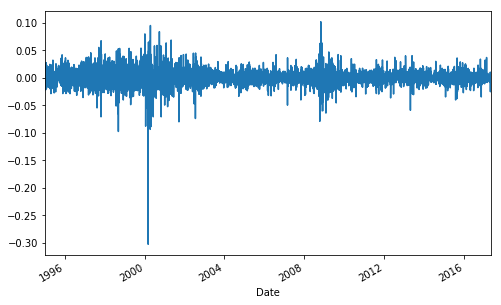

In [33]:
BRK['simple_return'].plot(figsize=(8,5))
plt.show()

In [34]:
avg_returns_d = BRK['simple_return'].mean()
avg_returns_d

0.00050295706047445352

In [38]:
avg_returns_a = avg_returns_d * 250 # multiply by the average number of business days per year
print(str(round(avg_returns_a, 5) * 100) + ' %')

12.574 %
